In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import cv2

DATA_DIR = r"C:\Users\Vaibhavi\Desktop\OCR\training"
CATEGORIES_ = ["0" , "1" , "2" , "3" , "4" , "5" , "6" , "7" , "8" , "9"]
training_data = []
for category in CATEGORIES_:
    path = os.path.join(DATA_DIR, category)
    class_num = CATEGORIES_.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (300, 300))
        img_flattened = new_array.ravel()
        training_data.append([img_flattened , class_num])
        

In [2]:
len(training_data)

400

In [3]:
training_data[0]

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0]

In [4]:
import random
random.shuffle(training_data)

In [5]:
training_data[0]

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0]

In [6]:
for sample in training_data[0:5]:
    print(sample[1])

0
4
0
6
4


In [7]:
x_train = []
y_train = []
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)

x_train = np.array(x_train)/255
y_train = np.array(y_train, dtype = int)
x_train.ndim, y_train.ndim
x_train[0].shape

(90000,)

##Simple neural network with no hidden layers

In [8]:
model_1 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(90000,), activation='sigmoid')
])
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_1.fit(x_train, y_train, epochs=10)

Epoch 1/10
13/13 [==============================] - 0s 7ms/step - loss: 125.0271 - accuracy: 0.1175
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: 77.2594 - accuracy: 0.1050
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 46.9877 - accuracy: 0.1400
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: 30.4507 - accuracy: 0.1550
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 20.3506 - accuracy: 0.2550
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 11.6738 - accuracy: 0.3000
Epoch 7/10
13/13 [==============================] - 0s 8ms/step - loss: 8.5976 - accuracy: 0.3650
Epoch 8/10
13/13 [==============================] - 0s 8ms/step - loss: 4.3877 - accuracy: 0.4500
Epoch 9/10
13/13 [==============================] - 0s 8ms/step - loss: 6.6911 - accuracy: 0.3775
Epoch 10/10
13/13 [==============================] - 0s 8ms/step - loss: 6.2749 - accuracy: 0.4475


In [9]:
fname_1 = "weights-no hidden layer"
model_1.save_weights(fname_1, overwrite = True)

##Neural network with one hidden layer

In [10]:
model_2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(90000,), activation='LeakyReLU'),
    keras.layers.Dense(10, activation='sigmoid')
])
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_2.fit(x_train, y_train, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 44ms/step - loss: 148.7339 - accuracy: 0.1275
Epoch 2/10
13/13 [==============================] - 0s 36ms/step - loss: 62.7217 - accuracy: 0.1000
Epoch 3/10
13/13 [==============================] - 1s 39ms/step - loss: 52.1131 - accuracy: 0.1025
Epoch 4/10
13/13 [==============================] - 0s 36ms/step - loss: 32.8974 - accuracy: 0.1750
Epoch 5/10
13/13 [==============================] - 1s 44ms/step - loss: 21.5692 - accuracy: 0.2225
Epoch 6/10
13/13 [==============================] - 0s 36ms/step - loss: 12.3375 - accuracy: 0.2300
Epoch 7/10
13/13 [==============================] - 0s 35ms/step - loss: 11.3030 - accuracy: 0.3275
Epoch 8/10
13/13 [==============================] - 0s 35ms/step - loss: 6.8215 - accuracy: 0.3900
Epoch 9/10
13/13 [==============================] - 0s 35ms/step - loss: 4.8471 - accuracy: 0.4550
Epoch 10/10
13/13 [==============================] - 0s 35ms/step - loss: 5.4095 - accuracy: 0.4375


In [11]:
fname_2 = "weights-no hidden layer"
model_2.save_weights(fname_2, overwrite = True)

#testing

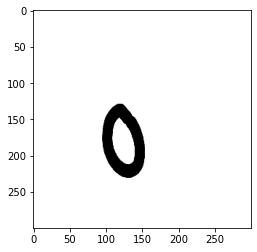

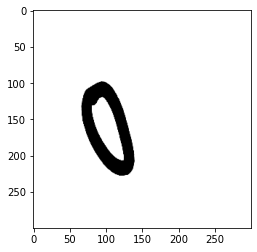

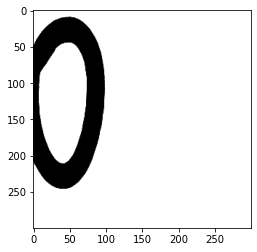

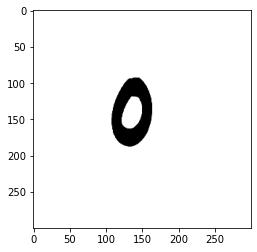

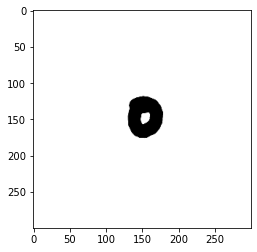

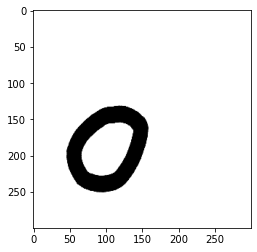

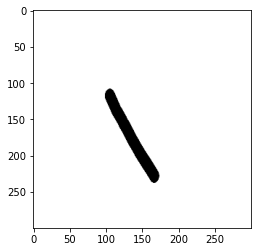

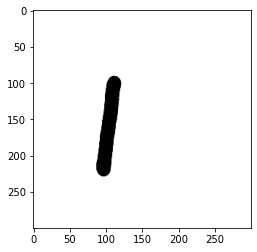

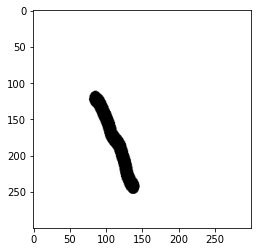

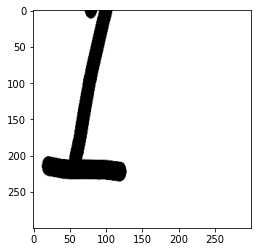

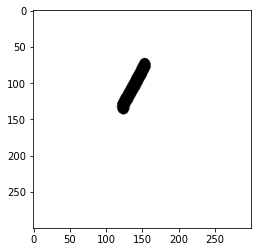

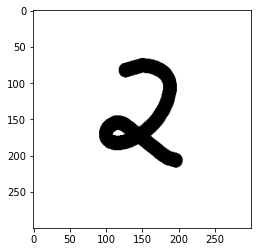

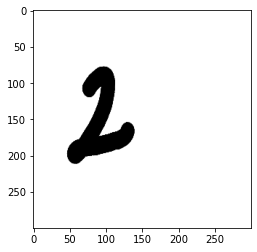

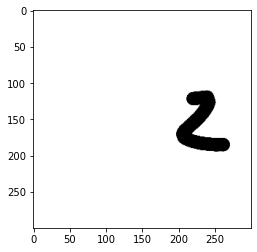

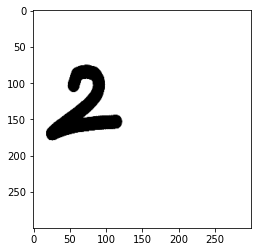

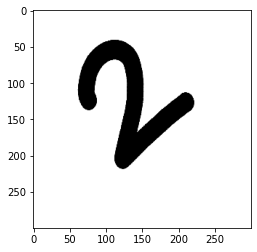

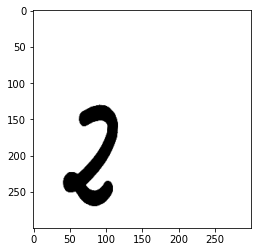

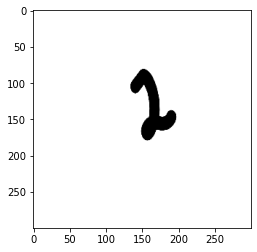

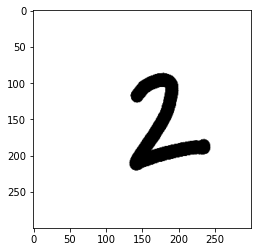

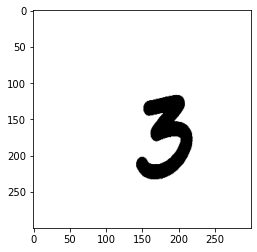

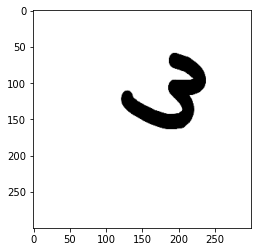

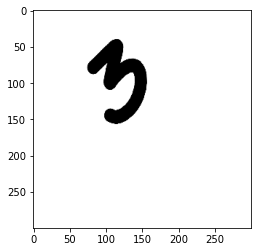

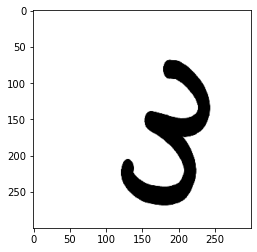

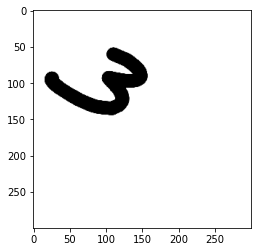

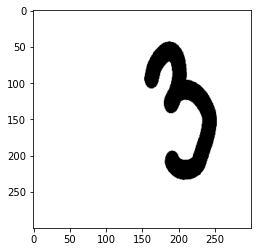

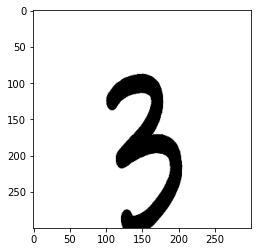

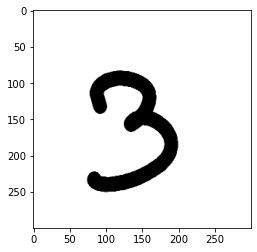

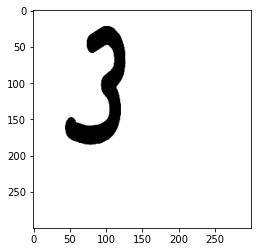

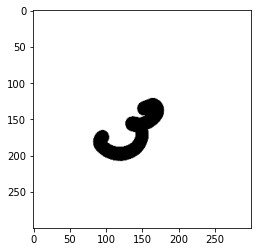

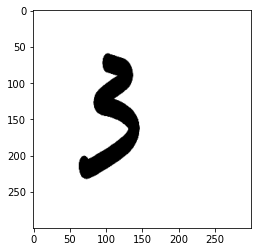

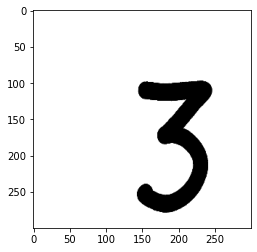

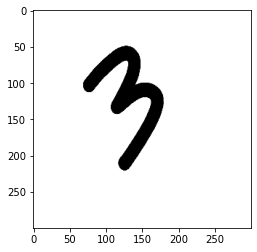

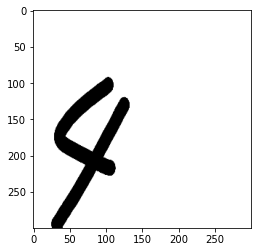

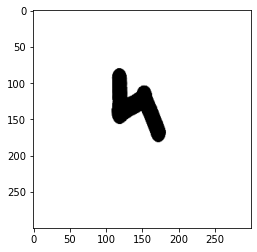

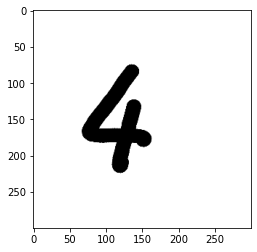

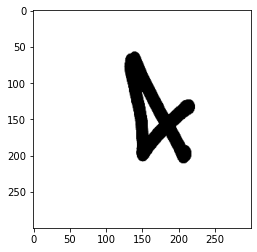

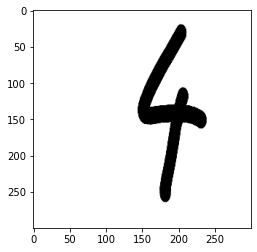

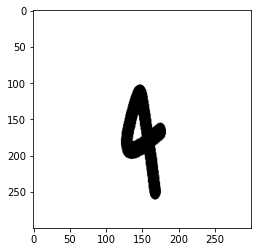

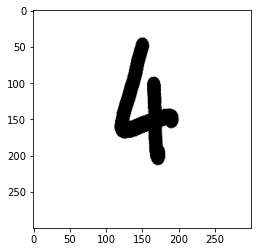

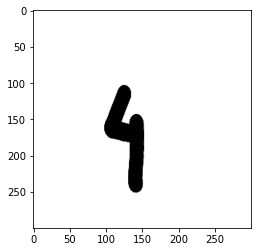

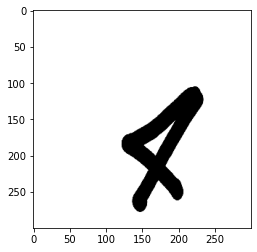

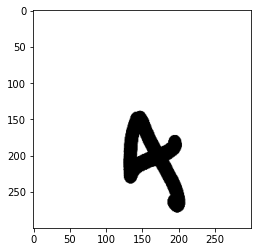

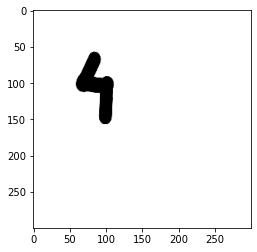

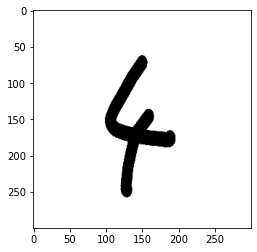

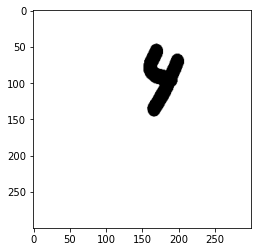

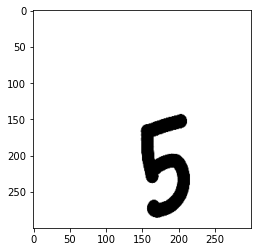

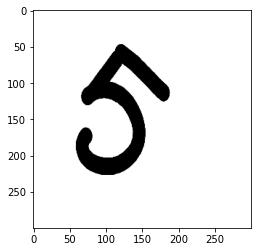

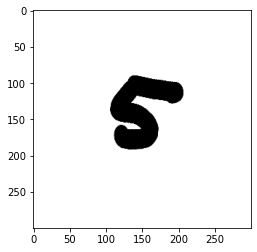

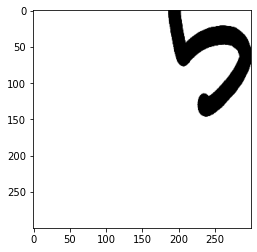

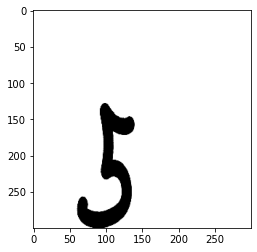

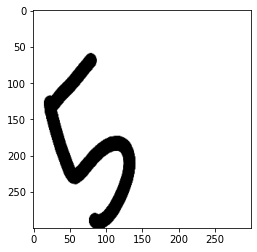

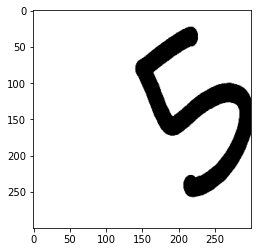

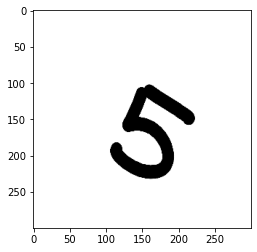

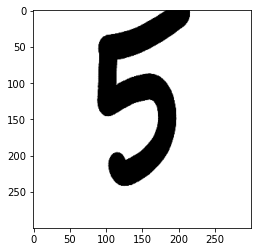

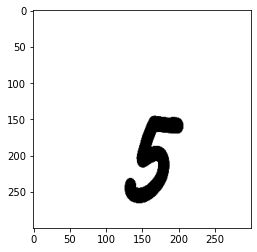

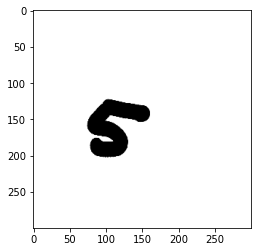

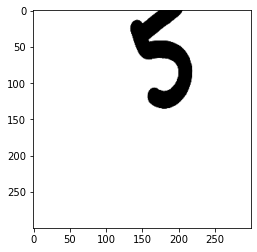

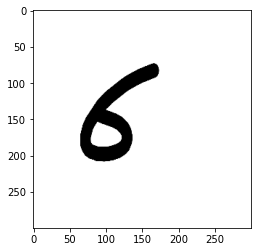

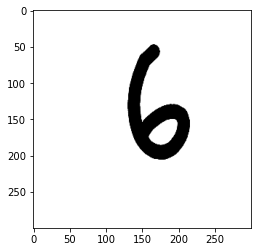

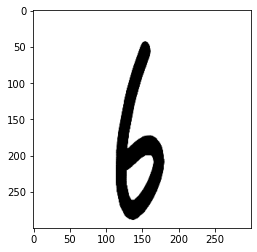

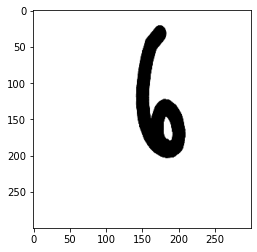

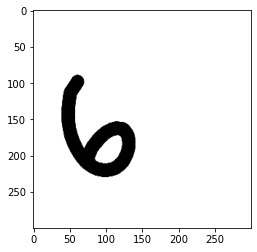

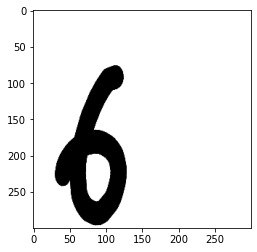

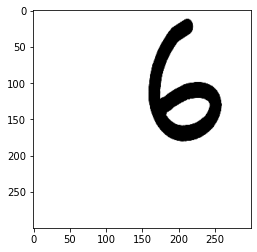

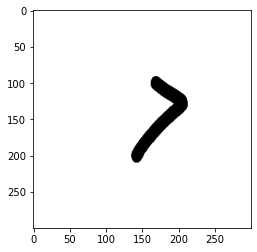

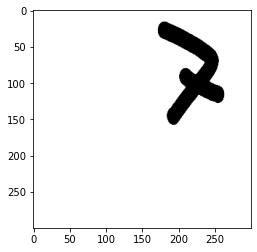

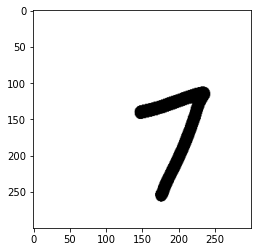

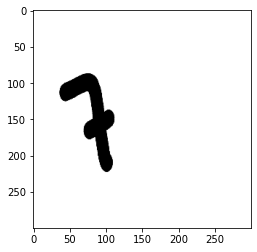

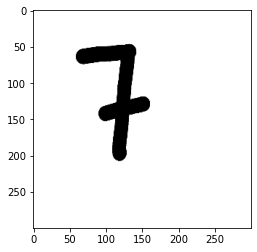

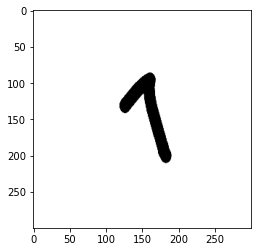

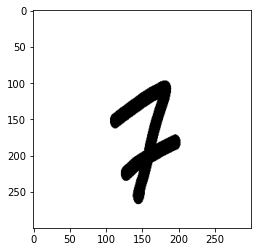

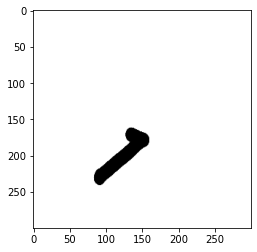

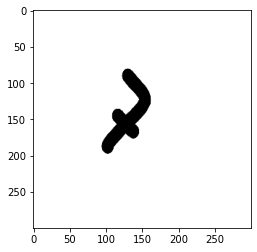

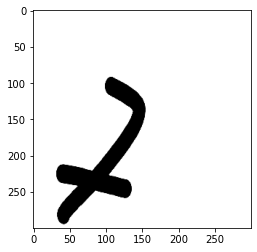

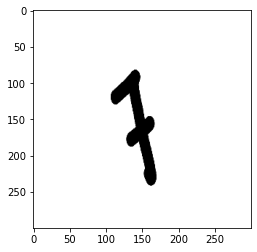

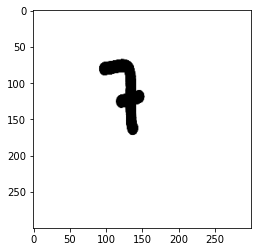

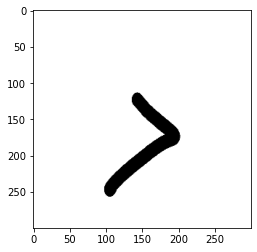

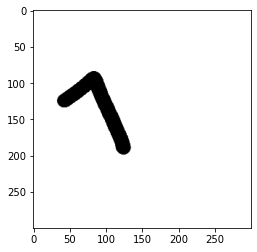

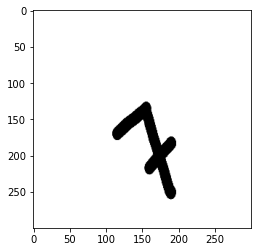

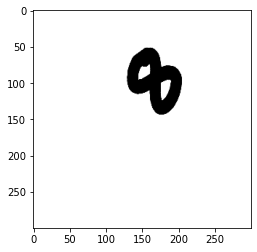

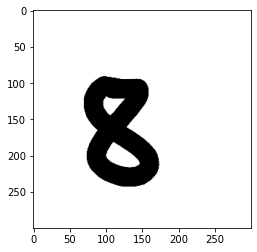

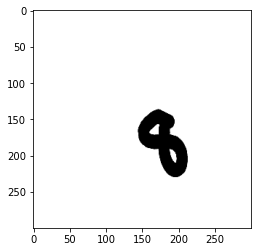

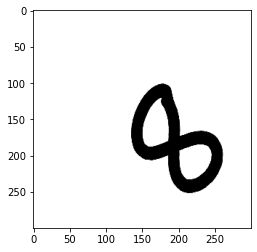

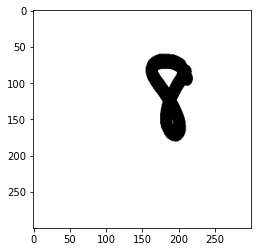

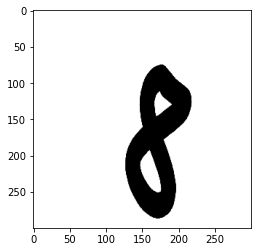

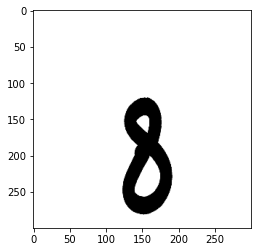

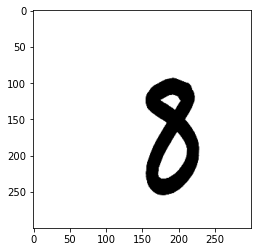

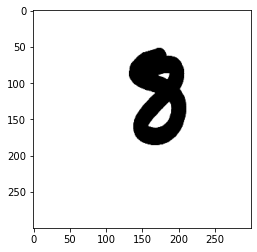

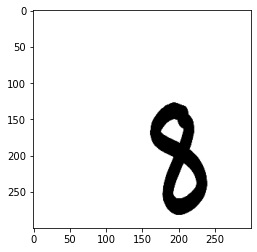

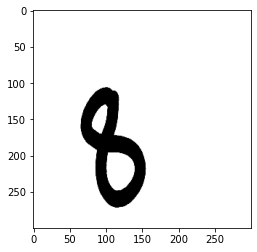

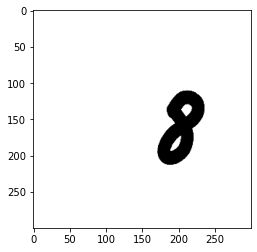

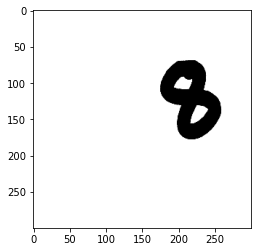

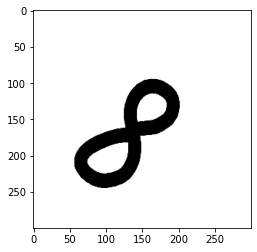

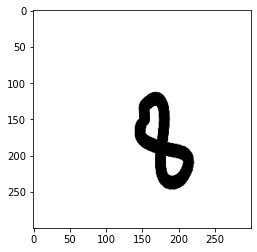

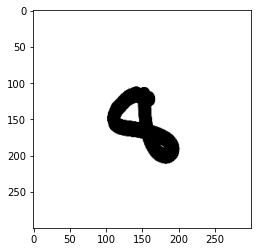

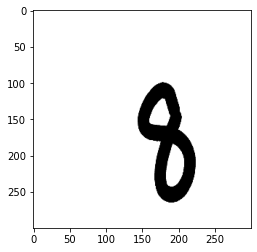

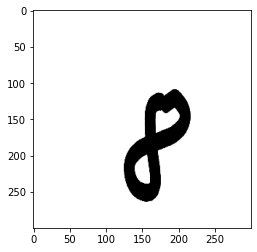

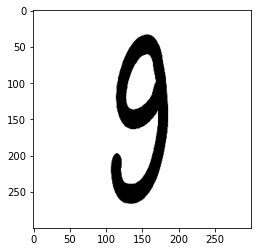

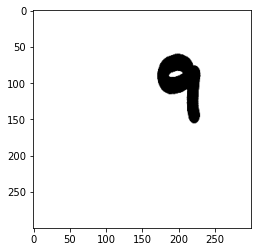

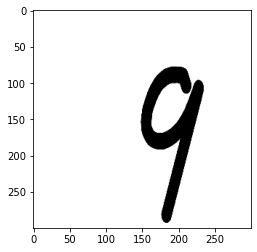

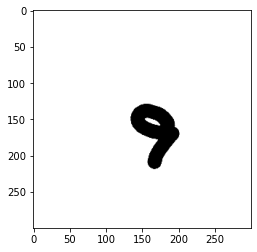

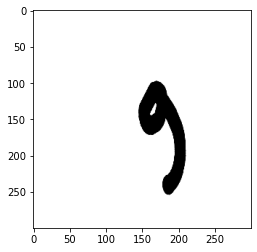

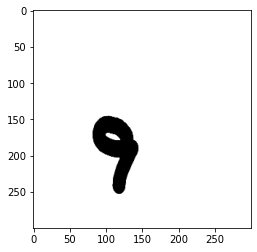

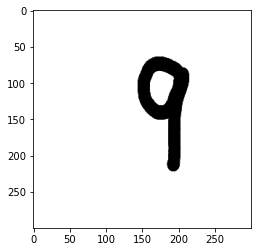

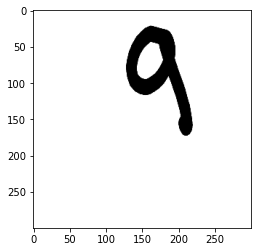

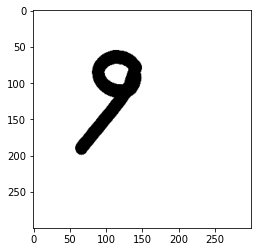

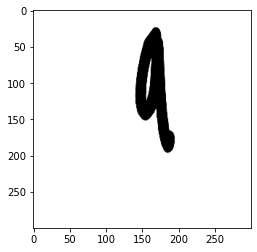

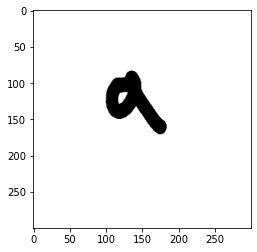

Predictions by model1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
Predictions by model2
4,0,4,8,8,4,4,0,0,5,5,8,4,4,4,8,0,7,0,0,5,9,5,9,5,8,8,0,8,5,0,0,4,8,8,8,8,8,8,4,4,8,4,8,7,4,8,8,7,4,2,7,8,0,4,4,0,0,8,8,8,2,2,0,0,0,0,4,8,8,8,2,8,8,8,9,8,0,8,7,4,4,8,0,8,8,0,7,0,0,0,0,8,8,8,8,8,8,7,8,8,8,2,0,7,0,9,5,

In [12]:
dir_path = r"C:\Users\Vaibhavi\Desktop\OCR\residual"
testing_data = []
for i in os.listdir(dir_path):
    test_array = cv2.resize(cv2.imread(os.path.join(dir_path, i), cv2.IMREAD_GRAYSCALE), (300, 300))
    plt.imshow(test_array, cmap = 'gray')
    plt.show()
    test_flattened= test_array.ravel()
    testing_data.append(test_flattened)

x_test = np.array(testing_data)/255
result_1 = list(model_1.predict(x_test))
print('Predictions by model1')
for sample_1 in result_1:
    print(np.argmax(sample_1), end=",")
    
result_2 = list(model_2.predict(x_test))
print('\nPredictions by model2')
for sample_2 in result_2:
    print(np.argmax(sample_2), end=",")